# Importando dados

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import cv2
import tensorflow
import matplotlib.pyplot as plot
from random import randint
from sklearn.preprocessing import OneHotEncoder

# Carregando arquivos

instalando o gdown

In [ ]:
!pip install -Uqqq gdown
!gdown 1XNSk1lEudBy8vYUNMx7De455UB5AwG-Y

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Downloading...
From: https://drive.google.com/uc?id=1XNSk1lEudBy8vYUNMx7De455UB5AwG-Y
To: /content/dataset.zip
100% 374M/374M [00:02<00:00, 165MB/s]


In [ ]:
import shutil

In [ ]:
shutil.unpack_archive('dataset.zip', 'dataset')

#Modelo das paisagens

In [ ]:
X = []
y = []
for files in glob.glob("/content/dataset/dataset/seg_train/**/*.jpg", recursive = True):
  image = cv2.imread(files)
  image = cv2.resize(image, (100,100))
  X.append(image)
  y.append(files.split('/')[-2])

In [ ]:
X = np.array(X)
y = np.array(y)
X.shape

(14034, 100, 100, 3)

##Divisão de treino e teste da base

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

##Separando as classes de y

In [ ]:
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = onehot.fit_transform(y_val.reshape(-1,1)).toarray()

In [ ]:
m = np.max(X_train) # valor maximo de rgb

X_train = X_train/m
X_val = X_val/m

In [ ]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
np.prod(X_train.shape[1:])

30000

In [ ]:
X_train.shape

(9402, 100, 100, 3)

##Arquitetura

In [ ]:
rede_simples = Sequential()
rede_simples.add(Flatten())
rede_simples.add(Dense(1028, input_dim=np.prod(X_train.shape[1:])))
# rede_simples.add(Dropout(0.7))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(512))
# rede_simples.add(Dropout(0.5))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(218))
# rede_simples.add(Dropout(0.7))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(6))
rede_simples.add(Activation('softmax'))


In [ ]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
                     metrics=['accuracy'])

##Treinamento

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                    patience = 5,
                    verbose = 1, 
                    mode = 'auto')

check = ModelCheckpoint(
    filepath='/content/Pickles/pickle1.sav',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
 
historico = rede_simples.fit(X_train, 
                             y_train, 
                             epochs = 50,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks=[es, check]
                             )

##Recuperar o melhor modelo

In [ ]:
rede_simples.load_weights('/content/Pickles/pickle2.sav')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(X_val)

accuracy_score(y_val.argmax(1), pred_simples.argmax(1))

0.5990932642487047

In [ ]:
X = []
y = []
for files in glob.glob("/content/dataset/dataset/seg_test/**/*.jpg", recursive = True):
  image = cv2.imread(files)
  image = cv2.resize(image, (100,100))
  X.append(image)
  y.append(files.split('/')[-2])

In [ ]:
X = np.array(X)
y = np.array(y)
X.shape

(3000, 100, 100, 3)

In [ ]:
onehot = OneHotEncoder()
y_test = onehot.fit_transform(y.reshape(-1, 1)).toarray()
# y_val = onehot.fit_transform(y_val.reshape(-1,1)).toarray()

In [ ]:
pred_simples = rede_simples.predict(X)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.5563333333333333

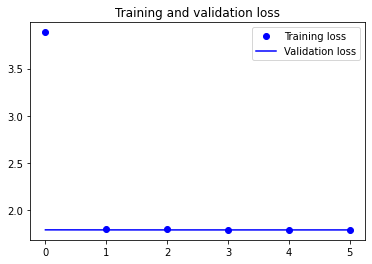

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
rede_simples.save('/content/drive/MyDrive/Santander/Modulo 5/Atividade 1/pickle_paisagem.sav')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Santander/Modulo 5/Atividade 1/pickle_paisagem.sav/assets


# Dataset Cifar10